# Great Recession Finance Project

In this data project we will focus on exploratory data analysis of bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016. 

This project is meant to demonstrate data anlysis and visualization skills using Python and its data science libraries: Pandas, NumPy, Matplotlib, Seaborn, Plotly, and Cufflinks. It is not meant to be a robust financial analysis or be taken as financial advice.


In [94]:
from pandas_datareader import data, wb
import yfinance as yf
yf.pdr_override()

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

## Data

We will explore stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [95]:
# Set the timeframe. (The start and end times can be modified to explore other timeframes).

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [96]:
# Bank of America
BAC = data.DataReader("BAC", start, end)

# CitiGroup
C = data.DataReader("C", start, end)

# Goldman Sachs
GS = data.DataReader("GS", start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", start, end)

# Morgan Stanley
MS = data.DataReader("MS", start, end)

# Wells Fargo
WFC = data.DataReader("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [97]:
# Create a list of the ticker symbols for the banks in alphabetical order.

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [98]:
# Concatenate the bank dataframes together into a single data frame.

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [99]:
# Set the column name levels.

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [100]:
# Check the head of the bank_stocks dataframe.

bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695671  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348438  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390095  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341461  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362305  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310352  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333878  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428040  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463341  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828144  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695114  11016400  
2006-01-04   31.530001  19.466673  10870000  
2006-01-05   31.495001  19.445066  10158000  
2006-01-06   31.680000  19.559284   8403800  
2006-01-09   31.674999  19.556200   5619600  

[5 rows x 36 columns]

## Exploratory Data Analysis


### Maximum Close price for each bank's stock throughout the time period:

####  -  We can clearly see that CitGroup and Goldman Sachs are ouliers.

In [101]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** New dataframe that will contain the returns for each bank's stock. Returns are defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [102]:
returns = pd.DataFrame()

** Employ the pandas `pct_change()` method on the Close column to calculate the the return value. Iterate through each Bank Stock Ticker using a for loop, generating the returns column for each ticker, and assigning it as a column in the returns DataFrame.**

In [103]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Pairplot of the returns dataframe:

#### -  CitiGroup experienced a stock crash in 2008. Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) However, this pairplot takes its May 2011 stock split into account. You will see the enormous crash in value if you take a look a the stock price plot (which we will see later in the visualizations.)

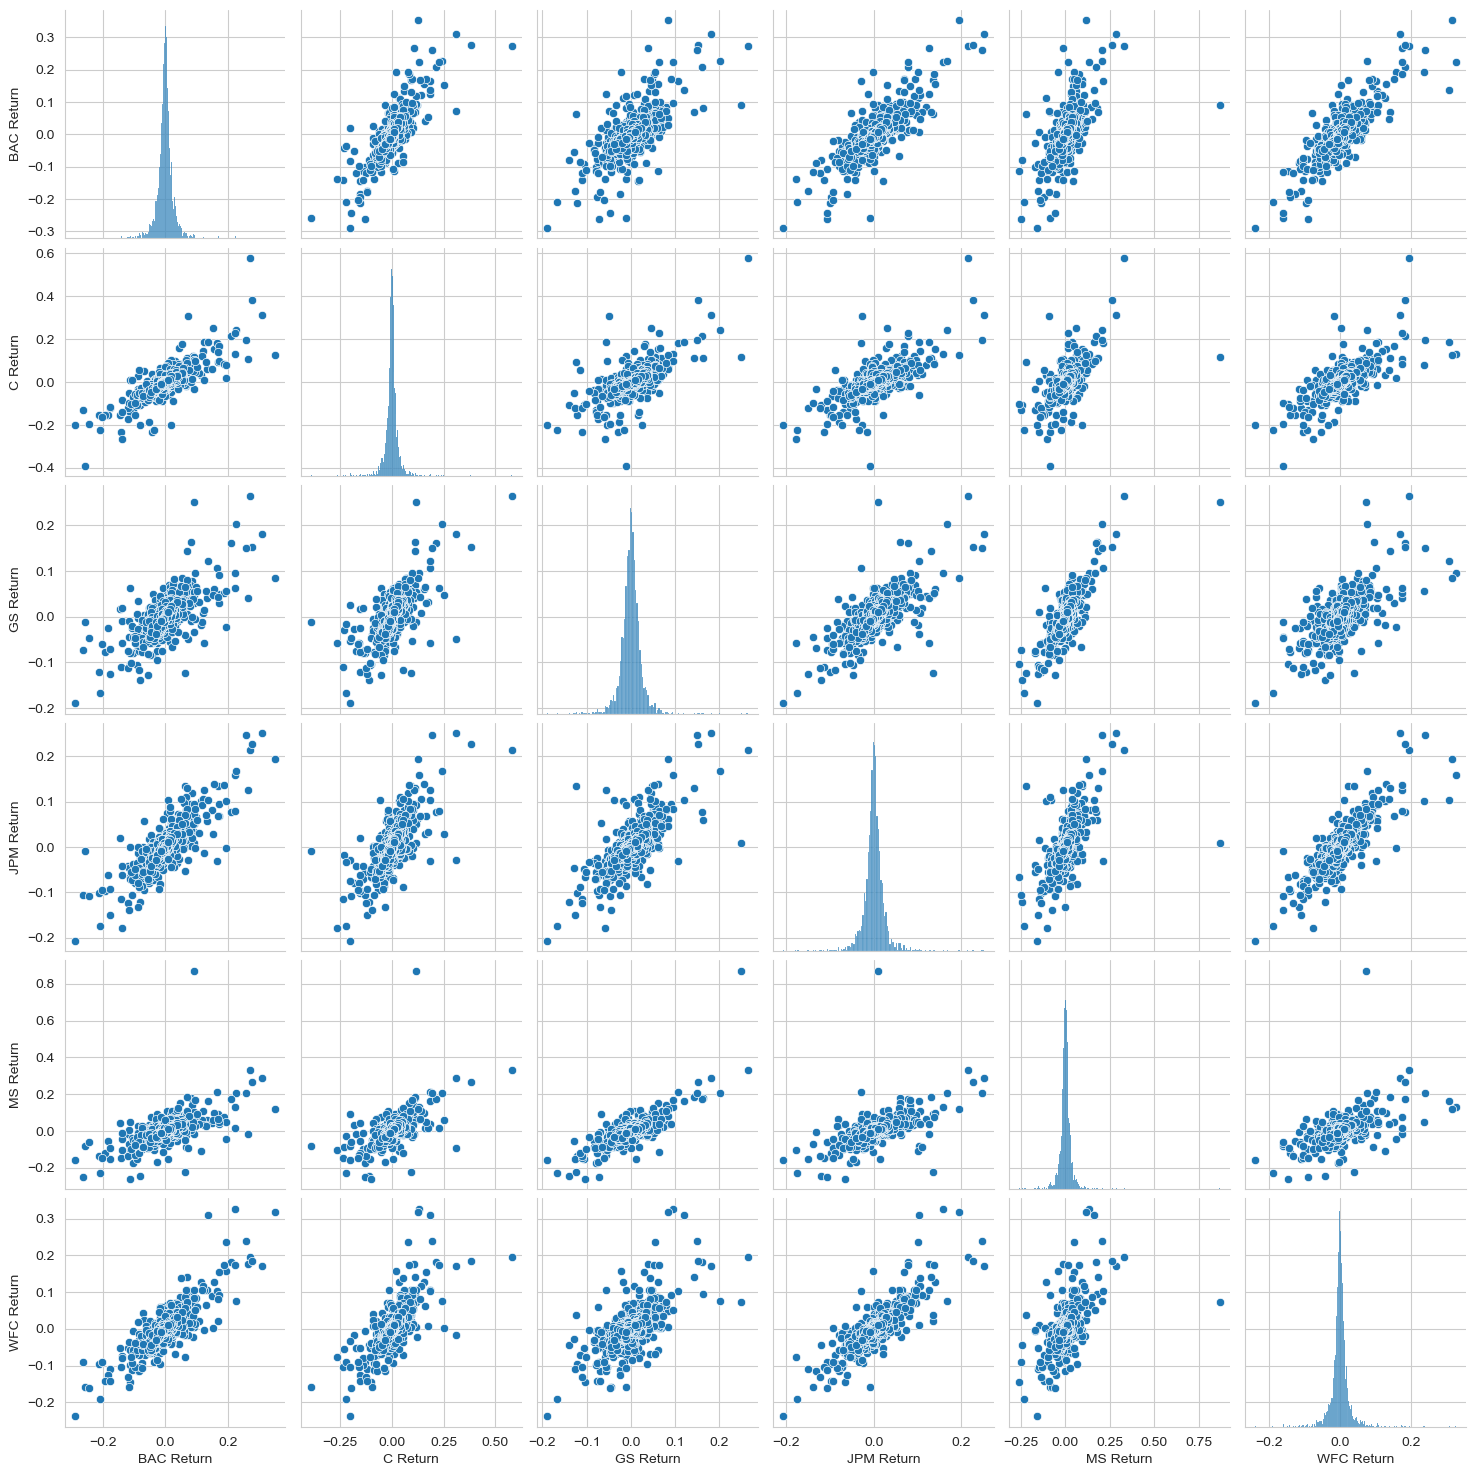

In [104]:
import seaborn as sns
sns.pairplot(returns[1:])

### Worst single day returns:

#### - Four banks share the same day which was Inauguration Day 2009.

In [105]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### Best single day returns:
#### - JP Morgan experienced their best single day the next day after their worst.

In [106]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### Standard deviation of returns:
#### - Citigroup was the riskiest over the entire time period of 2006-2016.

In [107]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

### Standard Deviation for 2015:
#### - Risk profiles are similar, but Morgan Stanley and Bank of America were slightly more risky.

In [108]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

### Histogram  of the 2015 returns for Morgan Stanley:


<Axes: xlabel='MS Return', ylabel='Count'>

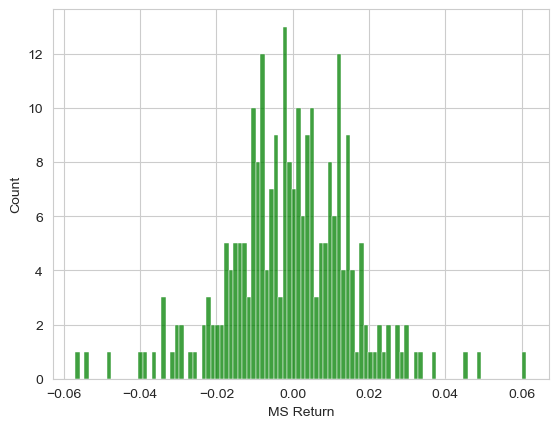

In [109]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

### Histogram of the 2008 returns for CitiGroup:

<Axes: xlabel='C Return', ylabel='Count'>

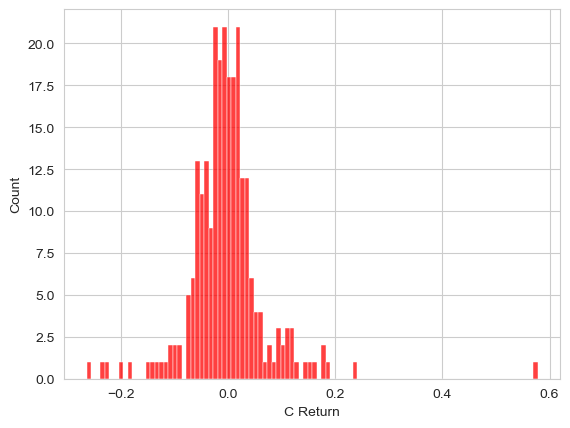

In [110]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

### Line plot of the Close Price over entire time period:


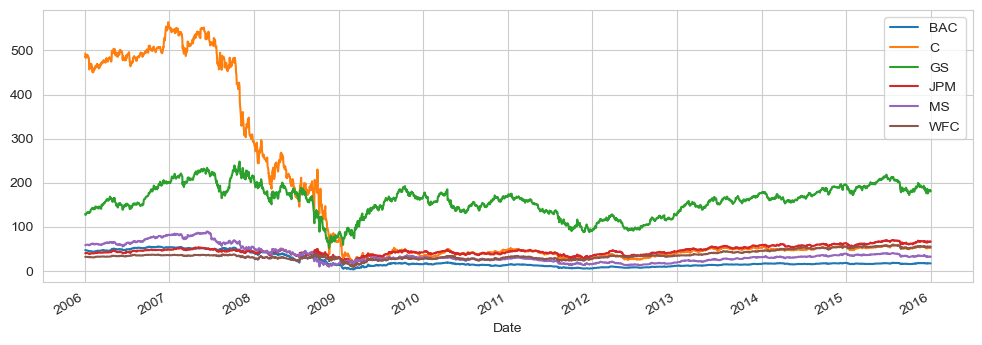

In [111]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
    
plt.legend()

### Cross section of Close Price:

<Axes: xlabel='Date'>

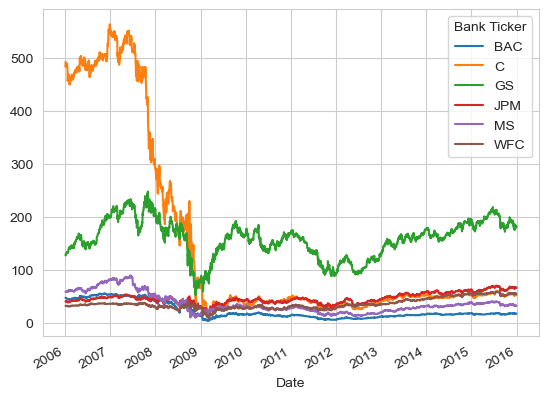

In [112]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

### Interactive line plot:
#### Mouse over a line to see specific data fot that period.

In [113]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages for stocks in 2008


### Rolling 30 day average against the Close Price for Bank Of America's stock:

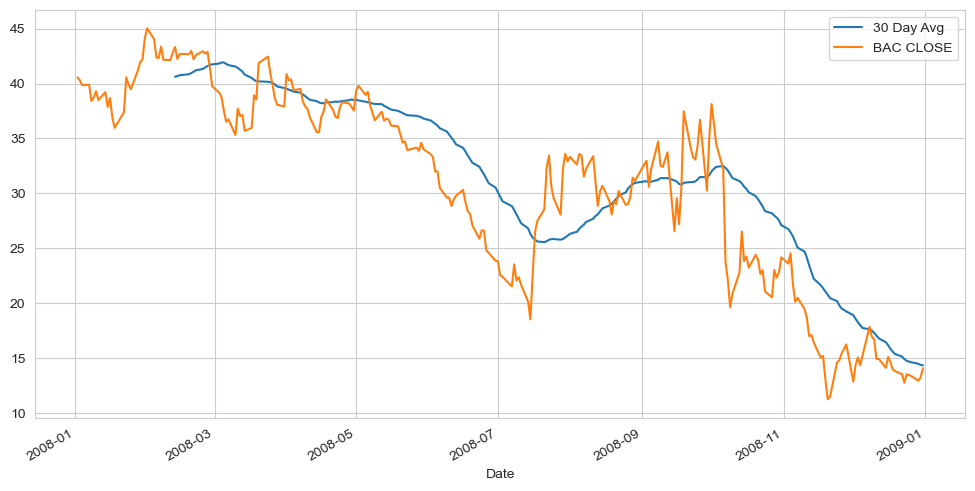

In [114]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

### Heat Map of the correlation between the stock Close Price:

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

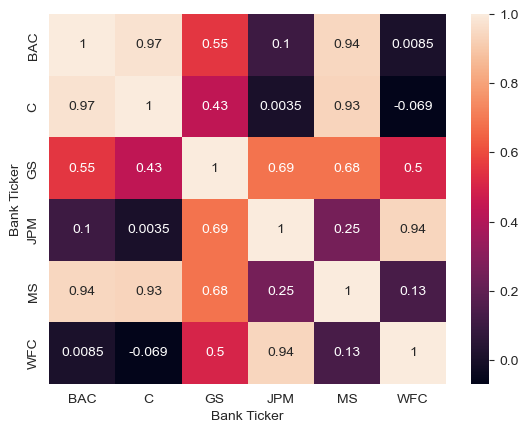

In [115]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

### Clustered correlations:

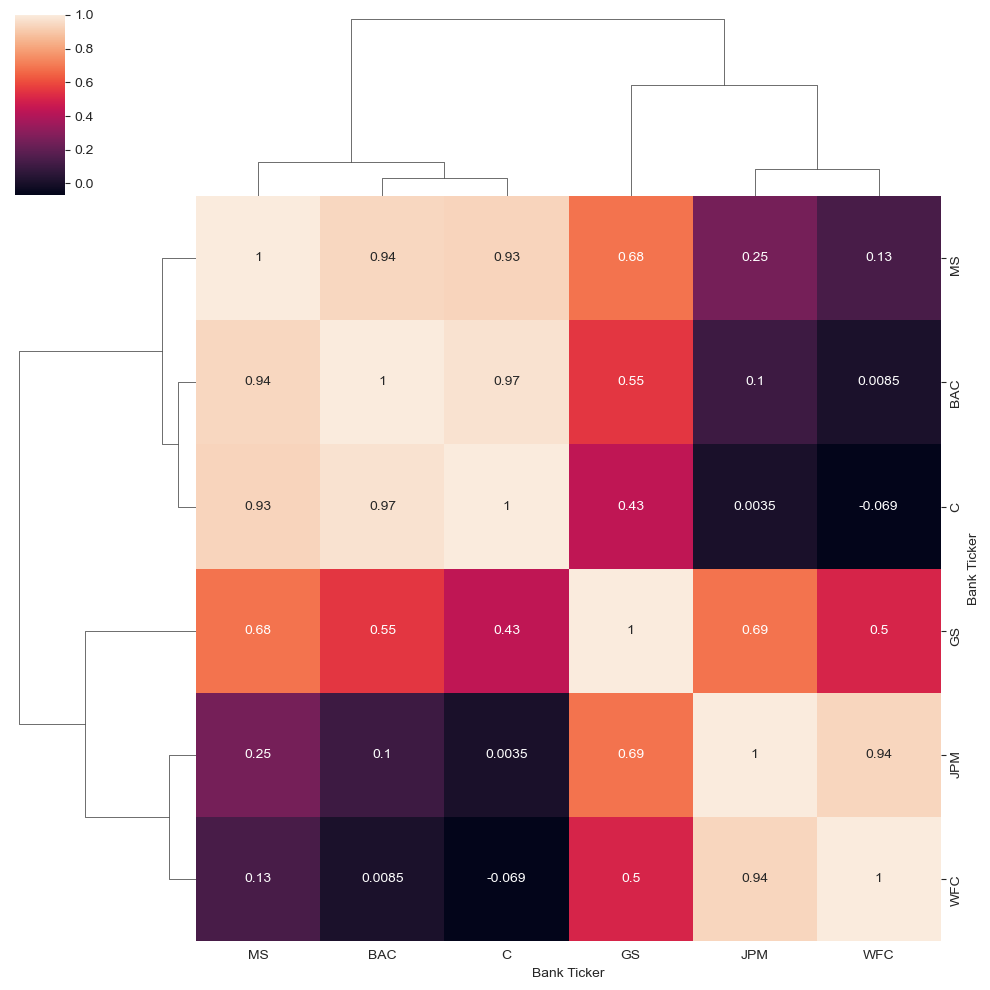

In [116]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

### Interactive heat map:

In [117]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Technical Analysis

### Candlestick plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016:

In [118]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

### Simple Moving Averages plot of Morgan Stanley for 2015:
#### - The periods shown are the past 13 (sort-term), 21(medium-term), and 55(long-term) closing days.

In [119]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

### Bollinger Band Plot for Bank of America for the year 2015:
#### - Upper band is plus 2 standard deviations, lower is minus 2.

In [120]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Conclusion


In this data analysis project, we focused on exploring the stock performance of six major banks from the period of the Great Recession to early 2016. The banks included in the analysis were Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, and Wells Fargo.

Through analysis and visualization, we made several key observations:

1. Citigroup and Goldman Sachs stood out as outliers with their maximum closing prices throughout the analyzed period.

2. The pairplot of the returns dataframe takes into account Citigroup's May 2011 stock split. By examining the stock price plot later in the visualizations, we saw the enormous crash in value.

3. Four banks experienced their worst single-day returns on Inauguration Day 2009, while JPMorgan Chase had its best single-day return the day after its worst.

4. Citigroup was identified as the riskiest bank based on the standard deviation of returns over the analyzed period.

5. The histograms of 2015 returns for Morgan Stanley and 2008 returns for Citigroup provided insights into the distribution and volatility of their stock prices during those significant periods.

6. The line plots and interactive line plot allowed for a visual comparison of the closing prices of each bank's stock over time.

7. The correlation heatmap and clustered heatmap provided insights into the relationships and associations among the bank stocks' closing prices. However, it's important to note that correlation does not necessarily imply causation. While the heatmaps highlighted the interdependencies, further analysis is required to establish any causal relationships between the stocks' performance.

8. The interactive heatmap provided a dynamic visualization of the correlation between the bank stocks' closing prices.

9. The candlestick plot for Bank of America's stock and the simple moving averages plot for Morgan Stanley's stock in 2015 provided insights into their price trends.

10. The Bollinger Bands plot for Bank of America's stock in 2015 illustrated the upper and lower bounds based on two standard deviations from the moving average.

Overall, this data analysis project provided valuable insights into the performance and interrelationships of major bank stocks during a significant financial period. It showcased various data visualization techniques and demonstrated the use of Python and its data science libraries for financial analysis. However, it is important to note that this project was not intended as a comprehensive financial analysis or as financial advice.